In [359]:
import numpy as np
import keras
from keras.layers import Input, Embedding, Flatten, Add, Dot, Concatenate, Dense
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import pickle

In [360]:
a = np.ones([2, 5])
b = np.zeros([2, 5])
input_a = keras.layers.Input(shape=[5])
input_b = keras.layers.Input(shape=[5])
out = keras.layers.Add()([input_a, input_b])
model = keras.models.Model([input_a,input_b],out)
print(model.predict([a,b]))

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


In [399]:
tf = open('train.csv','r')
tf.readline()
x_train = []
for line in tf:
    start = line.find(',')
    end = line.find('\n')
    line = line[start:end]
    x_train.append(line.split(',')[1:])
x_train = np.array(x_train)
x_train = x_train.astype(float)
x_train_user = x_train[:,0].astype(int)
x_train_item = x_train[:,1].astype(int)
y_train = x_train[:,2]
y_mean = np.mean(y_train)
y_std = np.std(y_train)
#y_train = (y_train - y_mean) / y_std
np.random.seed(1)
np.random.shuffle(x_train_user)
np.random.seed(1)
np.random.shuffle(x_train_item)
np.random.seed(1)
np.random.shuffle(y_train)


In [62]:
print(x_train_user[0])
print(x_train_item[0])
print(y_train[0])

2707
1228
4.0


In [429]:
def get_model(n_users, n_items, latent_dim = 10):
    user_input = Input(shape=[1])
    item_input = Input(shape=[1])
    user_vec = Embedding(n_users, latent_dim, embeddings_initializer='random_normal')(user_input)
    user_vec = Flatten()(user_vec)
    item_vec = Embedding(n_items, latent_dim, embeddings_initializer='random_normal')(item_input)
    item_vec = Flatten()(item_vec)
    user_bias = Embedding(n_users, 1, embeddings_initializer='zeros')(user_input)
    user_bias = Flatten()(user_bias)
    item_bias = Embedding(n_items, 1, embeddings_initializer='zeros')(item_input)
    item_bias = Flatten()(item_bias)
    #user_vec  = keras.layers.normalization.BatchNormalization()(user_vec)
    #item_vec = keras.layers.normalization.BatchNormalization()(item_vec)
    r_hat = Dot(axes=1)([user_vec, item_vec])
    r_hat = Add()([r_hat,item_bias,user_bias])#user_bias,item_bias
    model = keras.models.Model([user_input, item_input], r_hat)
    model.compile(loss='mse', optimizer='sgd')
    return model

In [22]:
user_tag = []
item_tag = []
latent_dim = 10
for i in range(x_train.shape[0]):
    if x_train_user[i] not in user_tag:
        user_tag.append(x_train_user[i])
    if x_train_item[i] not in item_tag:
        item_tag.append(x_train_item[i])


NameError: name 'Input' is not defined

In [363]:
model = get_model(len(user_tag), len(item_tag), latent_dim)

In [366]:
user_len = 6040
item_len = 3688

latent_dim = 10
model = get_model(user_len, item_len, latent_dim)
numX = 899873
numV = 100000
callbacks = [EarlyStopping('val_loss', patience=5), ModelCheckpoint('best.h5', save_best_only=True)]
model.fit([x_train_user[numV:], x_train_item[numV:]], y_train[numV:], batch_size = 128, epochs = 1000,validation_data = ([x_train_user[:numV], x_train_item[:numV]], y_train[:numV]), callbacks=callbacks)

Train on 799873 samples, validate on 100000 samples
Epoch 1/1000
799873/799873 [==============================] - 15s - loss: 0.9741 - val_loss: 0.9534
Epoch 2/1000
799873/799873 [==============================] - 14s - loss: 0.9313 - val_loss: 0.9169
Epoch 3/1000
799873/799873 [==============================] - 14s - loss: 0.8988 - val_loss: 0.8886
Epoch 4/1000
799873/799873 [==============================] - 15s - loss: 0.8731 - val_loss: 0.8660
Epoch 5/1000
799873/799873 [==============================] - 15s - loss: 0.8523 - val_loss: 0.8474
Epoch 6/1000
799873/799873 [==============================] - 15s - loss: 0.8350 - val_loss: 0.8319
Epoch 7/1000
799873/799873 [==============================] - 15s - loss: 0.8204 - val_loss: 0.8188
Epoch 8/1000
799873/799873 [==============================] - 15s - loss: 0.8079 - val_loss: 0.8075
Epoch 9/1000
799873/799873 [==============================] - 15s - loss: 0.7971 - val_loss: 0.7976
Epoch 10/1000
799873/799873 [===================

799873/799873 [==============================] - 13s - loss: 0.6721 - val_loss: 0.6850
Epoch 82/1000
799873/799873 [==============================] - 13s - loss: 0.6718 - val_loss: 0.6847
Epoch 83/1000
799873/799873 [==============================] - 13s - loss: 0.6716 - val_loss: 0.6845
Epoch 84/1000
799873/799873 [==============================] - 13s - loss: 0.6713 - val_loss: 0.6843
Epoch 85/1000
799873/799873 [==============================] - 13s - loss: 0.6710 - val_loss: 0.6841
Epoch 86/1000
799873/799873 [==============================] - 14s - loss: 0.6707 - val_loss: 0.6838
Epoch 87/1000
799873/799873 [==============================] - 16s - loss: 0.6705 - val_loss: 0.6836
Epoch 88/1000
799873/799873 [==============================] - 14s - loss: 0.6702 - val_loss: 0.6834
Epoch 89/1000
799873/799873 [==============================] - 13s - loss: 0.6699 - val_loss: 0.6832
Epoch 90/1000
799873/799873 [==============================] - 13s - loss: 0.6697 - val_loss: 0.6830
Epoc

799873/799873 [==============================] - 14s - loss: 0.6595 - val_loss: 0.6758
Epoch 162/1000
799873/799873 [==============================] - 14s - loss: 0.6594 - val_loss: 0.6758
Epoch 163/1000
799873/799873 [==============================] - 16s - loss: 0.6593 - val_loss: 0.6757
Epoch 164/1000
799873/799873 [==============================] - 15s - loss: 0.6593 - val_loss: 0.6757
Epoch 165/1000
799873/799873 [==============================] - 15s - loss: 0.6592 - val_loss: 0.6756
Epoch 166/1000
799873/799873 [==============================] - 16s - loss: 0.6591 - val_loss: 0.6756
Epoch 167/1000
301568/799873 [==========>...................] - ETA: 9s - loss: 0.6583

KeyboardInterrupt: 

In [367]:
testf = open('test.csv','r')
testf.readline()
x_test = []
for line in testf:
    x_test.append(line.split(','))
x_test = np.array(x_test)
x_test_user = x_test[:, 1].astype(int)
x_test_item = x_test[:, 2].astype(int)
res = model.predict([x_test_user, x_test_item])
with open('predict.csv', 'w') as f:
    f.write('TestDataID,Rating\n')
    for i, v in  enumerate(res):
        f.write('%d,%f\n' %(i+1, v*y_std+y_mean))

In [415]:
user_len = 6040
item_len = 3688

latent_dim = 10
model = get_model(user_len, item_len, latent_dim)
numX = 899873
numV = 100000
#ld5 = []
#ld10 = []
ld15 = []
ld20 = []
model = get_model(user_len, item_len, 10)
for i in range(30):
    model.fit([x_train_user[numV:], x_train_item[numV:]], y_train[numV:], batch_size = 128, epochs = 1)
    score = model.evaluate([x_train_user[:numV], x_train_item[:numV]], y_train[:numV])
    ld15.append(score)
'''
model = get_model(user_len, item_len, 10) 
for i in range(10):
    model.fit([x_train_user[numV:], x_train_item[numV:]], y_train[numV:], batch_size = 128, epochs = 1)
    score = model.evaluate([x_train_user[:numV], x_train_item[:numV]], y_train[:numV])
    ld10.append(score)
model = get_model(user_len, item_len, 50)
for i in range(10):
    model.fit([x_train_user[numV:], x_train_item[numV:]], y_train[numV:], batch_size = 128, epochs = 1)
    score = model.evaluate([x_train_user[:numV], x_train_item[:numV]], y_train[:numV])
    ld15.append(score)
model = get_model(user_len, item_len, 100)
for i in range(10):
    model.fit([x_train_user[numV:], x_train_item[numV:]], y_train[numV:], batch_size = 128, epochs = 1)
    score = model.evaluate([x_train_user[:numV], x_train_item[:numV]], y_train[:numV])
    ld20.append(score)
'''

Epoch 1/1
100000/100000 [==============================] - 5s     
Epoch 1/1
100000/100000 [==============================] - 3s     
Epoch 1/1
 99648/100000 [============================>.] - ETA: 0s

'\nmodel = get_model(user_len, item_len, 10) \nfor i in range(10):\n    model.fit([x_train_user[numV:], x_train_item[numV:]], y_train[numV:], batch_size = 128, epochs = 1)\n    score = model.evaluate([x_train_user[:numV], x_train_item[:numV]], y_train[:numV])\n    ld10.append(score)\nmodel = get_model(user_len, item_len, 50)\nfor i in range(10):\n    model.fit([x_train_user[numV:], x_train_item[numV:]], y_train[numV:], batch_size = 128, epochs = 1)\n    score = model.evaluate([x_train_user[:numV], x_train_item[:numV]], y_train[:numV])\n    ld15.append(score)\nmodel = get_model(user_len, item_len, 100)\nfor i in range(10):\n    model.fit([x_train_user[numV:], x_train_item[numV:]], y_train[numV:], batch_size = 128, epochs = 1)\n    score = model.evaluate([x_train_user[:numV], x_train_item[:numV]], y_train[:numV])\n    ld20.append(score)\n'

In [416]:
print(ld5)
print(ld10)
print(ld15)

[10.686720119171143, 8.3957363078308109, 6.8029138369750974, 5.6686955393218996, 4.8432666324615479, 4.2299533554077149, 3.7653656306076049, 3.4070275932312013, 3.1257731739807131, 2.9013227482986452, 2.7193597786331178, 2.569748448524475, 2.4449091252517698, 2.339464044456482, 2.2493081541061399, 2.1714019312286377, 2.1033243591308595, 2.0433903137397764, 1.9901394667816161, 1.9424879794120788, 1.8995409893608093, 1.8606028100013734, 1.8251090124320983, 1.7925907040405273, 1.7626647717285155, 1.7350271672058106, 1.7094115812301636, 1.6855737604713439, 1.6633490307617187, 1.6425400475120544]
[11.60364644744873, 9.838163272094727, 8.5280201902771005, 7.5272343363952636, 6.7428880114746095, 6.1152216953277589, 5.603760366668701, 5.1804342797088623, 4.8253426918029785, 4.5240985494232175, 4.2659380440902712, 4.0426521427536013, 3.8480089997863769, 3.6771875263595581, 3.5262692609024047, 3.3921505850601195, 3.2723271812438965, 3.1647242307662964, 3.0676971829032897, 2.9798365675735474, 2.8

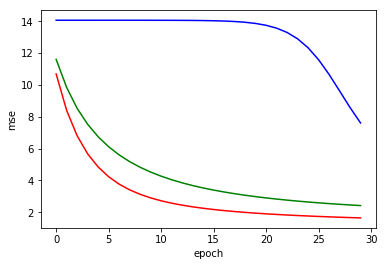

In [417]:
import matplotlib.pyplot as plt
plt.plot(range(30), ld5, 'r')
plt.plot(range(30), ld10, 'g')
plt.plot(range(30), ld15, 'b')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [ ]:
----------------mf-----------------------
----------------dnn----------------------

In [334]:
userf = open('users.csv','r')
userInfo = []
userf.readline()
for line in userf:
    end = line.find('\n')
    line = line[:end]
    userInfo.append(line.split('::'))
userInfo = np.array(userInfo)
userInfo_id = []
userInfo_gender = []
userInfo_age = []
userInfo_occupation = []
userInfo_zipcode = []
zipcode_taglist = []
for i in range(userInfo.shape[0]):
    userInfo_id.append(userInfo[i,0])
    if userInfo[i, 1] == 'F': 
        userInfo_gender.append('0')
    else :
        userInfo_gender.append('1')
    userInfo_age.append(userInfo[i,2])
    userInfo_occupation.append(userInfo[i,3])
    userInfo_zipcode.append(userInfo[i,4])
    if userInfo[i,4] not in zipcode_taglist:
        zipcode_taglist.append(userInfo[i,4])
userInfo_id = np.array(userInfo_id).astype(int)
userInfo_gender = np.array(userInfo_gender).astype(float)
userInfo_age = np.array(userInfo_age).astype(float)
userInfo_occupation = np.array(userInfo_occupation).astype(int)
userInfo_zipcode = np.array(userInfo_zipcode)

### make user_id dict ###
userIdMapIdx = dict.fromkeys(userInfo_id)
for i in range(userInfo.shape[0]):
    userIdMapIdx[userInfo_id[i]] = i
### make zipcode dict ###
zipcodeMapInt = dict.fromkeys(userInfo_id)
for i in range(len(zipcode_taglist)):
    zipcodeMapInt[zipcode_taglist[i]] = i
    
### create zipcode idx ###
zipcode_index = np.zeros(userInfo.shape[0])
for i in range(userInfo.shape[0]):
    zipcode_index[i] = zipcodeMapInt[userInfo_zipcode[i]]
zipcode_index = zipcode_index.astype(int)

x_train_userInfo = []
for i in range(numX):
    temp = []
    ti = userIdMapIdx[x_train_user[i]]
    temp.append(userInfo_gender[ti])
    temp.append(userInfo_age[ti])
    temp.append(userInfo_occupation[ti])
    temp.append(zipcode_index[ti])
    x_train_userInfo.append(temp)
x_train_userInfo = np.array(x_train_userInfo)
x_train_userInfo = x_train_userInfo.astype(float)
age = x_train_userInfo[:,1]
nor_age = (age - np.mean(age))/np.std(age)
x_train_userInfo[:,1] = nor_age 



In [337]:
movief = pd.read_csv('movies.csv', sep='::', header = 0)
#print(movieInfo['Genres'][3])
#print(moviedata)
#print(movieInfo.shape)
Genres_taglist = []
movieInfo = []
movieInfoId = []
numMovie = movief.shape[0]
for i in range(numMovie):
    movieInfo.append(movief['Genres'][i].split('|'))
    movieInfoId.append(movief['movieID'][i])
for i in range(numMovie):
    for j in range(len(movieInfo[i])):
        if movieInfo[i][j] not in Genres_taglist:
            Genres_taglist.append(movieInfo[i][j])
            
#print(movieInfo)
#print(Genres_taglist)
Genres_len = len(Genres_taglist)
Genres_vec = []
### make movie id dict ###
movieIdMapIdx = dict.fromkeys(movieInfoId)
for i in range(numMovie):
    movieIdMapIdx[movieInfoId[i]] = i
for i in range(numMovie):
    temp = []
    for j in range(Genres_len):
        if Genres_taglist[j] not in movieInfo[i]:
            temp.append(0)
        else:
            temp.append(1)
    Genres_vec.append(temp)
Genres_vec = np.array(Genres_vec)

x_train_movie = np.zeros((numX, Genres_len))
for i in range(numX):
    x_train_movie[i] = Genres_vec[  movieIdMapIdx[  x_train_item[i]  ]  ]



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [315]:
def get_dnnmodel(n_users, n_items, n_occ, n_zip, latent_dim = 10):
    user_input = Input(shape=[1])
    item_input = Input(shape=[1])
    user_occ = Input(shape=[1])
    user_zip = Input(shape=[1])
    user_Info = Input(shape=[2])
    item_Info = Input(shape=[18])
    user_vec = Embedding(n_users, latent_dim, embeddings_initializer='random_normal')(user_input)
    user_vec = Flatten()(user_vec)
    item_vec = Embedding(n_items, latent_dim, embeddings_initializer='random_normal')(item_input)
    item_vec = Flatten()(item_vec)
    #user_bias = Embedding(n_users, 1, embeddings_initializer='zeros')(user_input)
    #user_bias = Flatten()(user_bias)
    #item_bias = Embedding(n_items, 1, embeddings_initializer='zeros')(item_input)
    #item_bias = Flatten()(item_bias)
    
    user_occ_vec = Embedding(n_occ, 20, embeddings_initializer='random_normal')(user_occ)
    user_occ_vec = Flatten()(user_occ_vec)
    user_zip_vec = Embedding(n_zip, 20, embeddings_initializer='random_normal')(user_zip)
    user_zip_vec = Flatten()(user_zip_vec)
    
    merge_vec = Concatenate()([user_vec, item_vec, user_occ_vec, user_zip_vec, user_Info, item_Info])
    hidden = Dense(500, activation='relu')(merge_vec)
    hidden = Dropout(0.1)(hidden)
    hidden = Dense(250, activation='relu')(hidden)
    hidden = Dropout(0.1)(hidden)
    hidden = Dense(125, activation='relu')(hidden)
    output = Dense(1)(hidden)
    model = keras.models.Model([user_input, item_input, user_occ, user_zip, user_Info, item_Info], output)
    model.compile(loss='mse', optimizer='adam')
    return model

In [431]:
user_len = 6040
item_len = 3688
latent_dim = 10
n_occ = 21
n_zip = 3439
dnn_model = get_dnnmodel(user_len, item_len,  n_occ, n_zip, latent_dim)
numX = 899873
numV = 100000
'''
cbs = [EarlyStopping('val_loss', patience=10), ModelCheckpoint('dnn3best.h5', save_best_only=True)]
dnn_model.fit([x_train_user[numV:], x_train_item[numV:], x_train_userInfo[numV:,2], 
               x_train_userInfo[numV:,3], x_train_userInfo[numV:,:2],x_train_movie[numV:]]
              , y_train[numV:], 
              batch_size = 128, 
              epochs = 1000,
              validation_data = ( [x_train_user[:numV], x_train_item[:numV], x_train_userInfo[:numV,2], 
                                 x_train_userInfo[:numV,3], x_train_userInfo[:numV,:2],x_train_movie[:numV]]
                                 , y_train[:numV])  
             ,callbacks=cbs)
'''

"\ncbs = [EarlyStopping('val_loss', patience=10), ModelCheckpoint('dnn3best.h5', save_best_only=True)]\ndnn_model.fit([x_train_user[numV:], x_train_item[numV:], x_train_userInfo[numV:,2], \n               x_train_userInfo[numV:,3], x_train_userInfo[numV:,:2],x_train_movie[numV:]]\n              , y_train[numV:], \n              batch_size = 128, \n              epochs = 1000,\n              validation_data = ( [x_train_user[:numV], x_train_item[:numV], x_train_userInfo[:numV,2], \n                                 x_train_userInfo[:numV,3], x_train_userInfo[:numV,:2],x_train_movie[:numV]]\n                                 , y_train[:numV])  \n             ,callbacks=cbs)\n"

In [327]:
dnn_model.fit([x_train_user[numV:], x_train_item[numV:], x_train_userInfo[numV:,2], 
               x_train_userInfo[numV:,3], x_train_userInfo[numV:,:2],x_train_movie[numV:]]
              , y_train[numV:], 
              batch_size = 128, 
              epochs = 1,
              validation_data = ( [x_train_user[:numV], x_train_item[:numV], x_train_userInfo[:numV,2], 
                                 x_train_userInfo[:numV,3], x_train_userInfo[:numV,:2],x_train_movie[:numV]]
                                 , y_train[:numV]) )

Train on 799873 samples, validate on 100000 samples
Epoch 1/1
799873/799873 [==============================] - 33s - loss: 165.9841 - val_loss: 0.7666


In [340]:
#print(np.min(x_train_userInfo[:,1]))
print(x_test_userInfo[0])

[  0.         -2.4419657  10.          0.       ]


In [332]:
dnn_model.load_weights('strongbest.h5')
score = dnn_model.evaluate([x_train_user[:numV], x_train_item[:numV], x_train_userInfo[:numV,2], 
                                 x_train_userInfo[:numV,3], x_train_userInfo[:numV,:2],x_train_movie[:numV]]
                                 , y_train[:numV])
print(score)

 99616/100000 [============================>.] - ETA: 0s0.75117012321


In [432]:
dnn_model.load_weights('strongbest.h5')
testf = open('test.csv','r')
testf.readline()
x_test = []
for line in testf:
    x_test.append(line.split(','))
x_test = np.array(x_test)
x_test_user = x_test[:, 1].astype(int)
x_test_item = x_test[:, 2].astype(int)

numT = 100336
x_test_userInfo = []
for i in range(numT):
    temp = []
    ti = userIdMapIdx[x_test_user[i]]
    temp.append(userInfo_gender[ti])
    temp.append(userInfo_age[ti])
    temp.append(userInfo_occupation[ti])
    temp.append(zipcode_index[ti])
    x_test_userInfo.append(temp)
x_test_userInfo = np.array(x_test_userInfo)
x_test_userInfo = x_test_userInfo.astype(float)
age = x_test_userInfo[:,1]
nor_age = (age - np.mean(age))/np.std(age)
x_test_userInfo[:,1] = nor_age 


numT = 100336
Genres_len = 18
x_test_movie = np.zeros((numT, Genres_len))
for i in range(numT):
    x_test_movie[i] = Genres_vec[  movieIdMapIdx[  x_test_item[i]  ]  ]
    
res = dnn_model.predict([x_test_user, x_test_item, x_test_userInfo[:,2], 
                    x_test_userInfo[:,3], x_test_userInfo[:,:2],x_test_movie])
with open('predict2.csv', 'w') as f:
    f.write('TestDataID,Rating\n')
    for i, v in  enumerate(res):
        f.write('%d,%f\n' %(i+1, v))

In [351]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [358]:
save_obj(userIdMapIdx, 'userIdMapIdx')
save_obj(userInfo_gender, 'userInfo_gender') 
save_obj(userInfo_age, 'userInfo_age') 
save_obj(userInfo_occupation, 'userInfo_occupation') 
save_obj(zipcode_index, 'zipcode_index') 
save_obj(Genres_vec, 'Genres_vec') 
save_obj(movieIdMapIdx, 'movieIdMapIdx') 
#newdic = load_obj('userIdMapIdx') 

In [430]:
from sklearn.manifold import TSNE
user_len = 6040
item_len = 3688

latent_dim = 10
#def get_emb():
    #movie_vec = Input(shape=[1])
    #out = Embedding(3688, 10, embeddings_initializer='random_normal')(movie_vec)
    #model = keras.models.Model([movie_vec], out)
    #model.compile(loss='mse', optimizer='adam')
    #return model
#emb = get_emb()
temp_model = get_model(user_len, item_len, latent_dim)
temp_model.load_weights('8743.h5')
#tmodel = TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
#wvector = tmodel.fit_transform(x)
#print(wvector)
#temp_model.summary()

ValueError: Dimension 0 in both shapes must be equal, but are 3688 and 6040 for 'Assign_797' (op: 'Assign') with input shapes: [3688,10], [6040,10].

In [433]:
nuserIdMapIdx = load_obj('userIdMapIdx')
nuserInfo_gender = load_obj('userInfo_gender') 
nuserInfo_age = load_obj('userInfo_age') 
nuserInfo_occupation = load_obj('userInfo_occupation') 
nzipcode_index = load_obj('zipcode_index') 
nGenres_vec = load_obj('Genres_vec') 
nmovieIdMapIdx = load_obj('movieIdMapIdx') 


In [440]:
print(nmovieIdMapIdx)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 92: 90, 93: 91, 94: 92, 95: 93, 96: 94, 97: 95, 98: 96, 99: 97, 100: 98, 101: 99, 102: 100, 103: 101, 104: 102, 105: 103, 106: 104, 107: 105, 108: 106, 109: 107, 110: 108, 111: 109, 112: 110, 113: 111, 114: 112, 115: 113, 116: 114, 117: 115, 118: 116, 119: 117, 120: 118, 121: 119, 122: 120, 123: 1